<a href="https://colab.research.google.com/github/Tanmaymane10/Transfer-learning/blob/main/vancouver_vehicle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/FA1 Scenario Dataset - Rolling Stock Fleet.csv")

In [ ]:
df.head()

,Equipment Number,Equipment Class,Equipment Category,Service Group,Department,Make,Model,Year,Site,Mileage2014 (km),HourMeter2018 (hours),DowntimeHours2018 (hours),LaborHours2018 (hours)
0,A0006,"VAN, MINI, 7 PASSENGER",light duty,Engineering Services,ENGINEERING EQUIPMENT CAR SHARE,FORD,WINDSTAR,2003,CROSSROADS (507 W. BROADWAY),6040.0,NaN,740.432781,102.75251
1,A0128,"AUTO, PASSENGER, COMPACT WAGON",light duty,Engineering Services,ENGINEERING SEWERS OPER.,FORD,FOCUS,2002,MANITOBA YD. (250 W. 70TH),1607.0,NaN,29.510834,4.07029
2,A0129,"AUTO, PASSENGER, MICRO COMPACT",light duty,Engineering Services,ENGINEERING SANITATION OPER.,MERCEDES,SMARTC,2008,MANITOBA YD. (250 W. 70TH),1323.0,NaN,4.696111,3.21806
3,A0131,"AUTO, PASSENGER, MICRO COMPACT",light duty,Engineering Services,ENGINEERING EQUIPMENT CAR SHARE,MERCEDES,SMARTC,2008,CROSSROADS (507 W. BROADWAY),3485.0,NaN,412.597220,54.35750
4,A0149,"AUTO, PASSENGER, COMPACT WAGON",light duty,Engineering Services,ENGINEERING STREETS OPER.,FORD,FOCUS,2006,NATIONAL YD. (701 NATIONAL),14379.0,NaN,89.826946,15.17277


In [ ]:
df.isna().sum()

,0
Equipment Number,0
Equipment Class,0
Equipment Category,0
Service Group,0
Department,0
Make,0
Model,0
Year,0
Site,0
Mileage2014 (km),330


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183 entries, 0 to 1182
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Equipment Number           1183 non-null   object 
 1   Equipment Class            1183 non-null   object 
 2   Equipment Category         1183 non-null   object 
 3   Service Group              1183 non-null   object 
 4   Department                 1183 non-null   object 
 5   Make                       1183 non-null   object 
 6   Model                      1183 non-null   object 
 7   Year                       1183 non-null   int64  
 8   Site                       1183 non-null   object 
 9   Mileage2014 (km)           853 non-null    float64
 10  HourMeter2018 (hours)      358 non-null    float64
 11  DowntimeHours2018 (hours)  1079 non-null   float64
 12  LaborHours2018 (hours)     1079 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage:

In [ ]:
df.shape

(1183, 13)

In [ ]:
mileage_col = "Mileage2014 (km)"

In [ ]:
# Calculating mean and median (ignoring NaN)
mean_mileage = df[mileage_col].mean(skipna=True)
median_mileage = df[mileage_col].median(skipna=True)

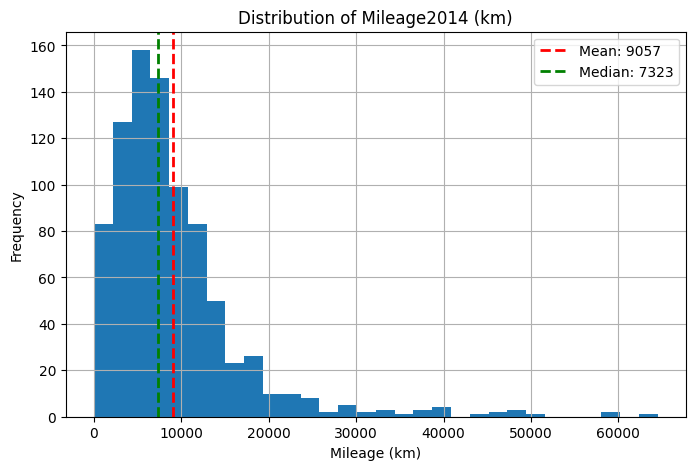

In [ ]:
plt.figure(figsize=(8,5))
df[mileage_col].dropna().hist(bins=30)
plt.axvline(mean_mileage, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_mileage:.0f}')
plt.axvline(median_mileage, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_mileage:.0f}')
plt.title("Distribution of Mileage2014 (km)")
plt.xlabel("Mileage (km)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

### Here the data is right skewed we can replace the null values in median since the data is not normally distributed and for the heavy equip vehicle the null value is remained as it is for construction equipment like excavators and bulldozers, mileage is less relevant than operating hours, as these machines often idle or operate without traveling long distances.

In [ ]:
df[mileage_col] = df.groupby("Equipment Category")[mileage_col]\
                    .transform(lambda x: x.fillna(x.median()))

In [ ]:
# Double checking if nulls remain
remaining_nulls = df[mileage_col].isna().sum()
remaining_nulls

np.int64(257)

In [ ]:
# Replace nulls in HourMeter2018 (hours) with 380 for Heavy Truck only
df.loc[
    (df["Equipment Category"] == "hvy trk") & (df["HourMeter2018 (hours)"].isna()),
    "HourMeter2018 (hours)"
] = 380

# Verify remaining nulls by category
df.groupby("Equipment Category")["HourMeter2018 (hours)"].apply(lambda x: x.isna().sum())

,HourMeter2018 (hours)
Equipment Category,
hvy equip,14
hvy trk,0
light duty,527


In [ ]:
# Replace nulls in HourMeter2018 (hours) with 380 for Heavy Truck only
df.loc[
    (df["Equipment Category"] == "hvy equip") & (df["HourMeter2018 (hours)"].isna()),
    "HourMeter2018 (hours)"
] = 377

# Verify remaining nulls by category
df.groupby("Equipment Category")["HourMeter2018 (hours)"].apply(lambda x: x.isna().sum())

,HourMeter2018 (hours)
Equipment Category,
hvy equip,0
hvy trk,0
light duty,527


In [ ]:
df.isna().sum()

,0
Equipment Number,0
Equipment Class,0
Equipment Category,0
Service Group,0
Department,0
Make,0
Model,0
Year,0
Site,0
Mileage2014 (km),257


In [ ]:
# Column name
downtime_col = "DowntimeHours2018 (hours)"

# Impute downtime using category-wise median
df[downtime_col] = df.groupby("Equipment Category")[downtime_col]\
                     .transform(lambda x: x.fillna(x.median()))

# If still missing (in case a whole category had only NaNs), fallback to overall median
df[downtime_col] = df[downtime_col].fillna(df[downtime_col].median())

# Check remaining nulls
df[downtime_col].isna().sum()

np.int64(0)

In [ ]:
# Column name
Labour_col = "LaborHours2018 (hours)"

# Impute downtime using category-wise median
df[Labour_col] = df.groupby("Equipment Category")[Labour_col]\
                     .transform(lambda x: x.fillna(x.median()))

# If still missing (in case a whole category had only NaNs), fallback to overall median
df[Labour_col] = df[Labour_col].fillna(df[Labour_col].median())

# Check remaining nulls
df[Labour_col].isna().sum()

np.int64(0)

In [ ]:
df.isna().sum()

,0
Equipment Number,0
Equipment Class,0
Equipment Category,0
Service Group,0
Department,0
Make,0
Model,0
Year,0
Site,0
Mileage2014 (km),257


### Exploratory Data Analysis

In [ ]:
df["Equipment Category"].value_counts()

,count
Equipment Category,
light duty,549
hvy trk,377
hvy equip,257


In [ ]:
df["Department"].value_counts()

,count
Department,
ENGINEERING STREETS OPER.,209
PARK BOARD VANCOUVER EAST DISTRICT,116
ENGINEERING SEWERS OPER.,106
ENGINEERING SANITATION UTILITY,74
PARK BOARD QUEEN ELIZABETH DISTRICT,73
ENGINEERING WATERWORKS OPER.,65
ENGINEERING TRAFF & ELEC SRVCS,62
PARK BOARD PLANNING AND OPERATIONS,61
ENGINEERING TRANSFER AND LANDFILL OPER.,52


In [ ]:
# Fleet composition by Equipment Category
fleet_by_category = df["Equipment Category"].value_counts()

# Fleet composition by Department
fleet_by_dept = df["Department"].value_counts().head(10)

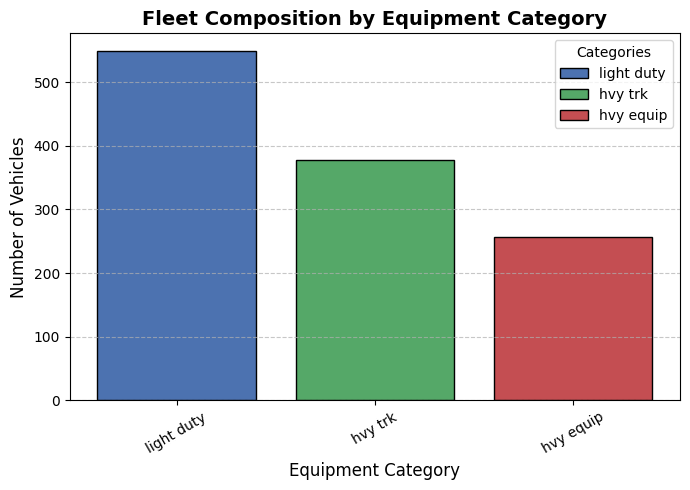

In [ ]:
# Plot - Equipment Category
plt.figure(figsize=(7,5))
bars = plt.bar(
    fleet_by_category.index,
    fleet_by_category.values,
    color=["#4C72B0", "#55A868", "#C44E52"],
    edgecolor="black"
)
plt.title("Fleet Composition by Equipment Category", fontsize=14, fontweight="bold")
plt.xlabel("Equipment Category", fontsize=12)
plt.ylabel("Number of Vehicles", fontsize=12)
plt.xticks(rotation=30, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(bars, fleet_by_category.index, title="Categories")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

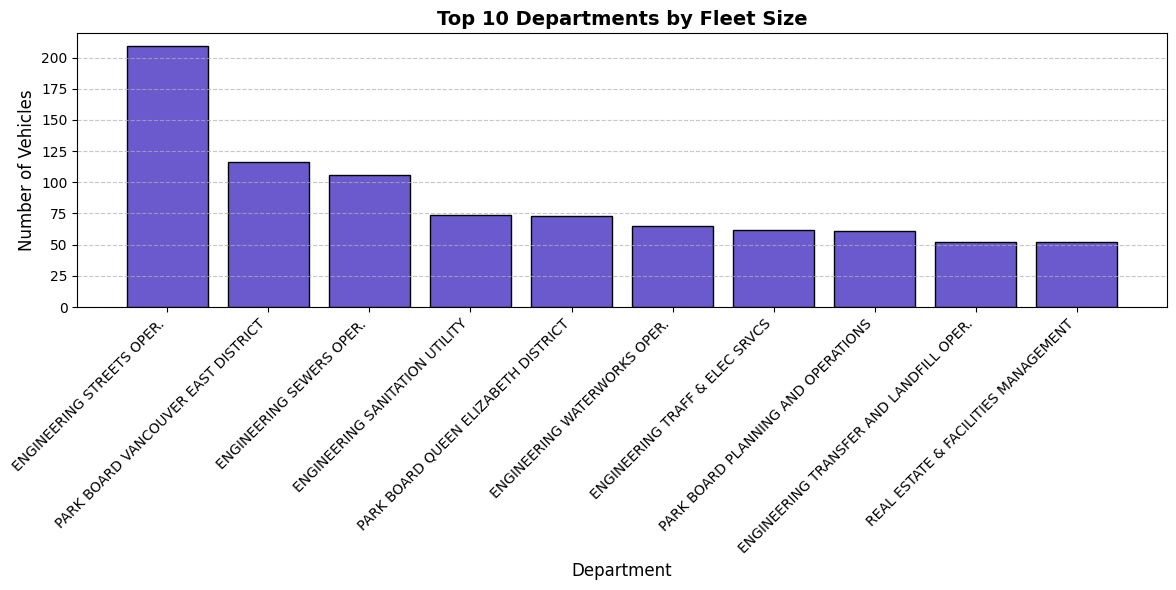

In [ ]:

# Plot - Department
plt.figure(figsize=(12,6))
bars = plt.bar(
    fleet_by_dept.index,
    fleet_by_dept.values,
    color="#6A5ACD",
    edgecolor="black"
)
plt.title("Top 10 Departments by Fleet Size", fontsize=14, fontweight="bold")
plt.xlabel("Department", fontsize=12)
plt.ylabel("Number of Vehicles", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

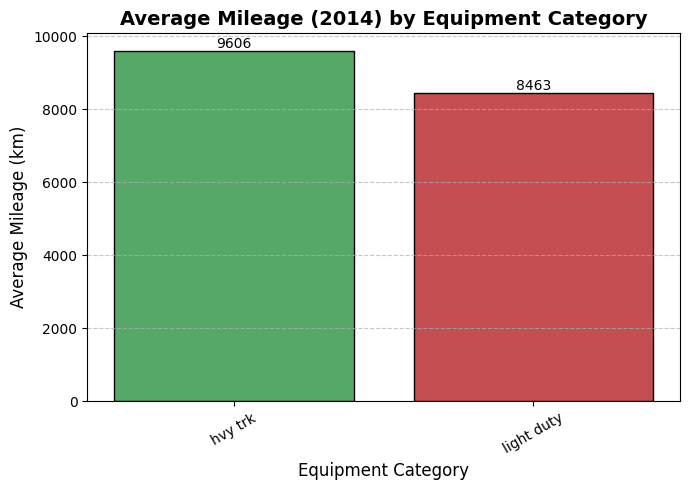

In [ ]:
# 1. Average Mileage by Equipment Category
avg_mileage = df.groupby("Equipment Category")["Mileage2014 (km)"].mean()

plt.figure(figsize=(7,5))
bars = plt.bar(avg_mileage.index, avg_mileage.values, color=["#4C72B0","#55A868","#C44E52"], edgecolor="black")
plt.title("Average Mileage (2014) by Equipment Category", fontsize=14, fontweight="bold")
plt.xlabel("Equipment Category", fontsize=12)
plt.ylabel("Average Mileage (km)", fontsize=12)
plt.xticks(rotation=30, fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{bar.get_height():.0f}",
             ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

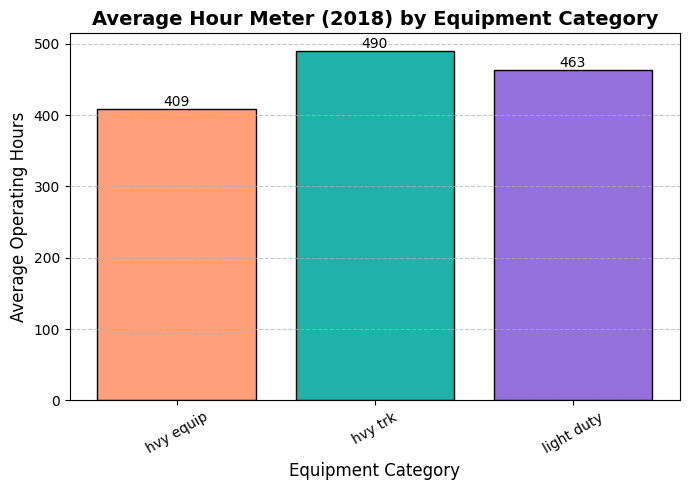

In [ ]:
# 2. Average HourMeter by Equipment Category
avg_hours = df.groupby("Equipment Category")["HourMeter2018 (hours)"].mean()

plt.figure(figsize=(7,5))
bars = plt.bar(avg_hours.index, avg_hours.values, color=["#FFA07A","#20B2AA","#9370DB"], edgecolor="black")
plt.title("Average Hour Meter (2018) by Equipment Category", fontsize=14, fontweight="bold")
plt.xlabel("Equipment Category", fontsize=12)
plt.ylabel("Average Operating Hours", fontsize=12)
plt.xticks(rotation=30, fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{bar.get_height():.0f}",
             ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

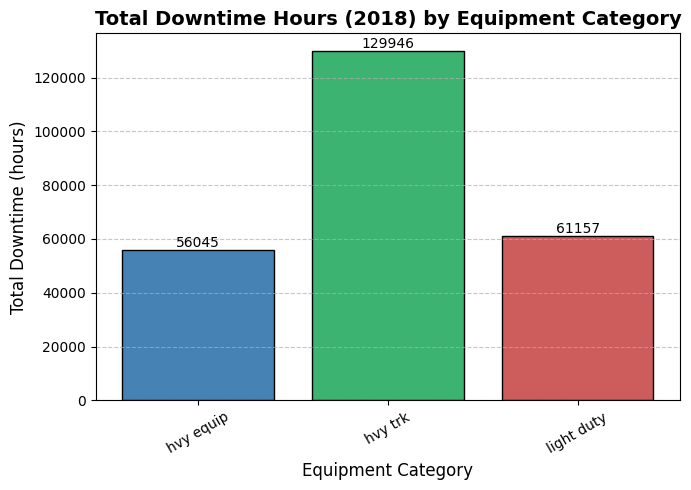

In [ ]:
# 1. Total and Average Downtime by Equipment Category
downtime_summary = df.groupby("Equipment Category")["DowntimeHours2018 (hours)"].agg(["sum", "mean"])

# Plot - Total Downtime
plt.figure(figsize=(7,5))
bars = plt.bar(downtime_summary.index, downtime_summary["sum"], color=["#4682B4","#3CB371","#CD5C5C"], edgecolor="black")
plt.title("Total Downtime Hours (2018) by Equipment Category", fontsize=14, fontweight="bold")
plt.xlabel("Equipment Category", fontsize=12)
plt.ylabel("Total Downtime (hours)", fontsize=12)
plt.xticks(rotation=30, fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{bar.get_height():.0f}",
             ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

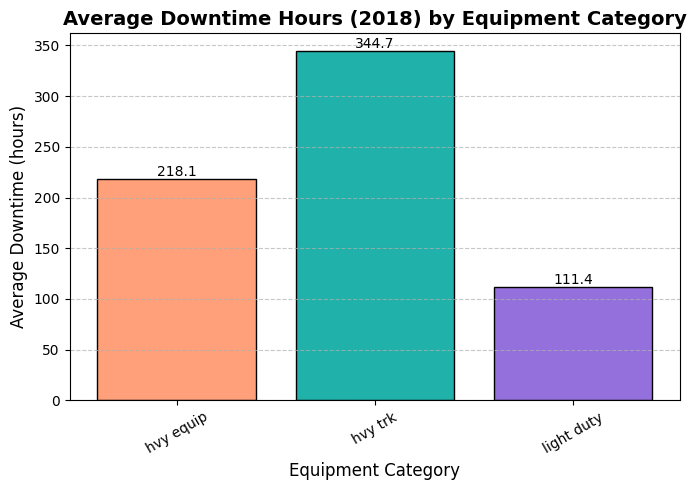

In [ ]:
# Plot - Average Downtime
plt.figure(figsize=(7,5))
bars = plt.bar(downtime_summary.index, downtime_summary["mean"], color=["#FFA07A","#20B2AA","#9370DB"], edgecolor="black")
plt.title("Average Downtime Hours (2018) by Equipment Category", fontsize=14, fontweight="bold")
plt.xlabel("Equipment Category", fontsize=12)
plt.ylabel("Average Downtime (hours)", fontsize=12)
plt.xticks(rotation=30, fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{bar.get_height():.1f}",
             ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

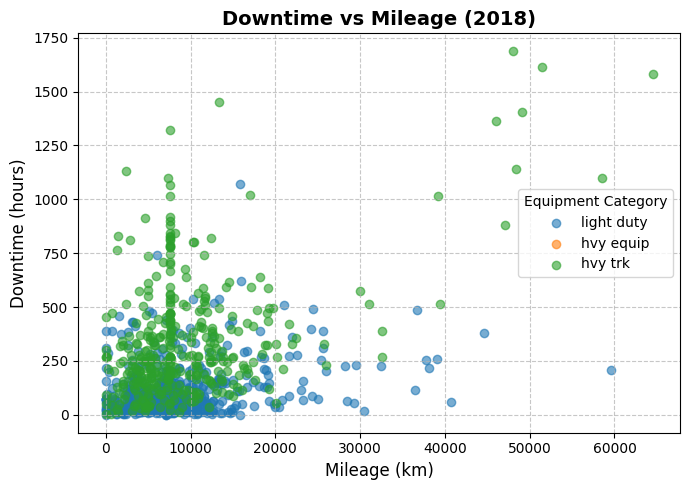

In [ ]:
# 2. Scatter Plot - Downtime vs Mileage
plt.figure(figsize=(7,5))
for category in df["Equipment Category"].unique():
    subset = df[df["Equipment Category"] == category]
    plt.scatter(subset["Mileage2014 (km)"], subset["DowntimeHours2018 (hours)"],
                label=category, alpha=0.6)

plt.title("Downtime vs Mileage (2018)", fontsize=14, fontweight="bold")
plt.xlabel("Mileage (km)", fontsize=12)
plt.ylabel("Downtime (hours)", fontsize=12)
plt.legend(title="Equipment Category")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
mileage_col = "Mileage2014 (km)"
def calculate_emission(row):
    category = row["Equipment Category"].strip().lower()
    mileage = row[mileage_col]

    if pd.isna(mileage):  # missing values
        return 0

    if category == "light duty":
        return mileage * 0.25
    elif category == "hvy trk":
        return mileage * 0.90
    else:  # hvy equip ignored
        return 0

df["Emissions2018 (kgCO2)"] = df.apply(calculate_emission, axis=1)

In [ ]:
# Check totals by equipment category
print(df.groupby("Equipment Category")["Emissions2018 (kgCO2)"].sum())

Equipment Category
hvy equip           0.0
hvy trk       3259179.0
light duty    1161496.0
Name: Emissions2018 (kgCO2), dtype: float64


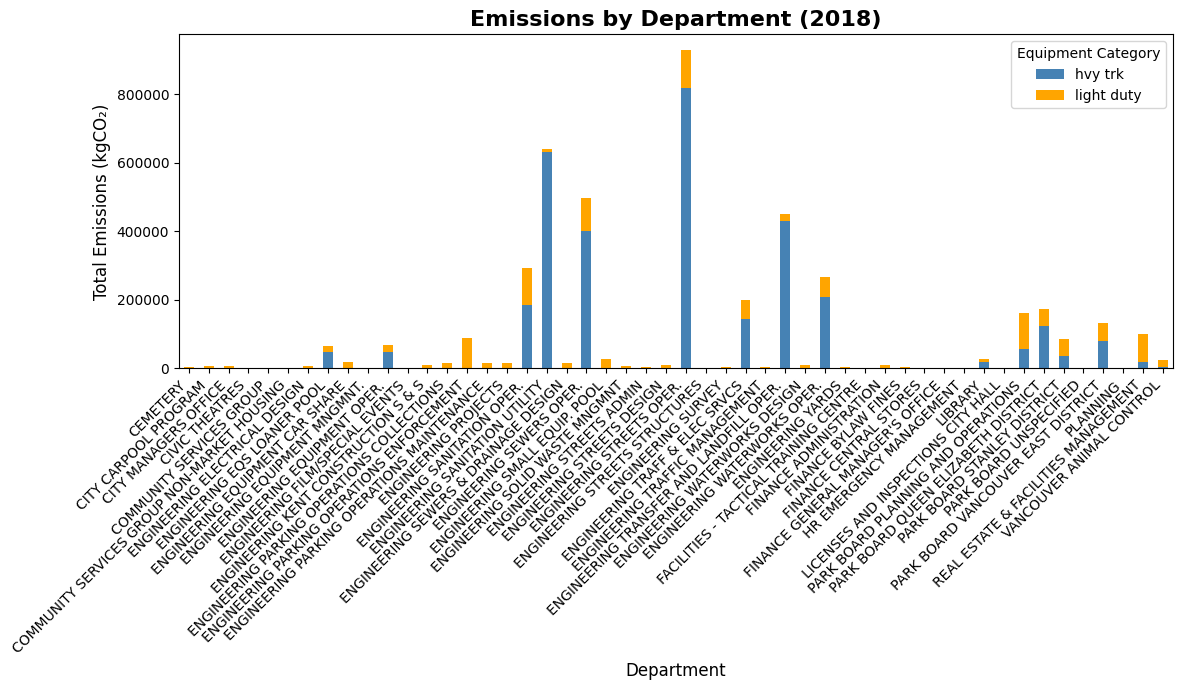

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Group emissions by Department and Equipment Category
emissions_by_dept = df.groupby(["Department", "Equipment Category"])["Emissions2018 (kgCO2)"].sum().unstack(fill_value=0)

# Drop hvy equip since emissions = 0
if "hvy equip" in emissions_by_dept.columns:
    emissions_by_dept = emissions_by_dept.drop(columns=["hvy equip"])

# Plot stacked bar chart
ax = emissions_by_dept.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 7),
    color={"hvy trk": "steelblue", "light duty": "orange"}
)

# Titles and labels
plt.title("Emissions by Department (2018)", fontsize=16, weight="bold")
plt.xlabel("Department", fontsize=12)
plt.ylabel("Total Emissions (kgCO₂)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Equipment Category", fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
# Filter only heavy trucks and light duty
target_categories = ["hvy trk", "light duty"]
total_emissions_2018 = df[df["Equipment Category"].isin(target_categories)]["Emissions2018 (kgCO2)"].sum()

# Calculating 20% reduction target
reduction_target = total_emissions_2018 * 0.20
target_emissions_2023 = total_emissions_2018 - reduction_target

print("Total Emissions 2018 (hvy trk + light duty):", total_emissions_2018)
print("20% Reduction Required:", reduction_target)
print("Target Emissions 2023:", target_emissions_2023)

Total Emissions 2018 (hvy trk + light duty): 4420675.0
20% Reduction Required: 884135.0
Target Emissions 2023: 3536540.0


In [ ]:
df.shape

(1183, 14)

In [ ]:
# Filter dataset for heavy trucks and light duty vehicles only
target_categories = ["hvy trk", "light duty"]
target_df = df[df["Equipment Category"].isin(target_categories)].copy()

In [ ]:
# Total emissions per department
dept_emissions = target_df.groupby("Department")["Emissions2018 (kgCO2)"].sum().sort_values(ascending=False)
total_emissions = dept_emissions.sum()

# Display current emissions by department
print("Total emissions by department:\n", dept_emissions)
print("\nTotal emissions (all departments):", total_emissions)

Total emissions by department:
 Department
ENGINEERING STREETS OPER.                      927745.40
ENGINEERING SANITATION UTILITY                 639802.00
ENGINEERING SEWERS OPER.                       496954.95
ENGINEERING TRANSFER AND LANDFILL OPER.        449096.00
ENGINEERING SANITATION OPER.                   293395.45
ENGINEERING WATERWORKS OPER.                   267682.85
ENGINEERING TRAFF & ELEC SRVCS                 200064.20
PARK BOARD QUEEN ELIZABETH DISTRICT            174313.75
PARK BOARD PLANNING AND OPERATIONS             162774.60
PARK BOARD VANCOUVER EAST DISTRICT             133743.90
REAL ESTATE & FACILITIES MANAGEMENT            101872.70
ENGINEERING PARKING OPERATIONS ENFORCEMENT      89742.50
PARK BOARD STANLEY DISTRICT                     87190.05
ENGINEERING EQUIPMENT OPER.                     69681.65
ENGINEERING EQS LOANER POOL                     66251.65
LIBRARY                                         28905.35
ENGINEERING SMALL EQUIP. POOL                

In [ ]:
# 20% reduction target
reduction_target = total_emissions * 0.20
target_emissions = total_emissions - reduction_target

print("\nReduction Target (20% of total):", reduction_target)
print("Target Total Emissions 2023:", target_emissions)


Reduction Target (20% of total): 884135.0
Target Total Emissions 2023: 3536540.0


In [ ]:
def proportional_reduction(dept_emissions, target_total):
    """
    Reduce department emissions proportionally to meet target_total.
    """
    current_total = dept_emissions.sum()
    reduction_factor = target_total / current_total
    reduced_emissions = dept_emissions * reduction_factor
    return reduced_emissions

# Apply proportional reduction
dept_emissions_reduced = proportional_reduction(dept_emissions, target_emissions)

# Show suggested reductions per department
dept_reduction = dept_emissions - dept_emissions_reduced
print("\nSuggested Reduction in Emissions by Department:\n", dept_reduction)


Suggested Reduction in Emissions by Department:
 Department
ENGINEERING STREETS OPER.                      185549.08
ENGINEERING SANITATION UTILITY                 127960.40
ENGINEERING SEWERS OPER.                        99390.99
ENGINEERING TRANSFER AND LANDFILL OPER.         89819.20
ENGINEERING SANITATION OPER.                    58679.09
ENGINEERING WATERWORKS OPER.                    53536.57
ENGINEERING TRAFF & ELEC SRVCS                  40012.84
PARK BOARD QUEEN ELIZABETH DISTRICT             34862.75
PARK BOARD PLANNING AND OPERATIONS              32554.92
PARK BOARD VANCOUVER EAST DISTRICT              26748.78
REAL ESTATE & FACILITIES MANAGEMENT             20374.54
ENGINEERING PARKING OPERATIONS ENFORCEMENT      17948.50
PARK BOARD STANLEY DISTRICT                     17438.01
ENGINEERING EQUIPMENT OPER.                     13936.33
ENGINEERING EQS LOANER POOL                     13250.33
LIBRARY                                          5781.07
ENGINEERING SMALL EQUIP. PO

In [ ]:
# Average emissions per vehicle per department
avg_emissions_per_vehicle = target_df.groupby("Department")["Emissions2018 (kgCO2)"].mean()

# Estimate number of vehicles to cut per department
vehicles_to_cut = (dept_reduction / avg_emissions_per_vehicle).round().astype(int)
vehicles_to_cut = vehicles_to_cut[vehicles_to_cut > 0]  # Only keep departments needing reductions

print("\nEstimated Number of Vehicles to Reduce per Department:\n", vehicles_to_cut)


Estimated Number of Vehicles to Reduce per Department:
 Department
ENGINEERING ELECTRICAL DESIGN                  1
ENGINEERING EQS LOANER POOL                    5
ENGINEERING EQUIPMENT CAR SHARE                2
ENGINEERING EQUIPMENT OPER.                    5
ENGINEERING KENT CONSTRUCTION S & S            1
ENGINEERING PARKING OPERATIONS COLLECTIONS     2
ENGINEERING PARKING OPERATIONS ENFORCEMENT     6
ENGINEERING PARKING OPERATIONS MAINTENANCE     1
ENGINEERING PROJECTS                           2
ENGINEERING SANITATION OPER.                  10
ENGINEERING SANITATION UTILITY                15
ENGINEERING SEWERS & DRAINAGE DESIGN           1
ENGINEERING SEWERS OPER.                      14
ENGINEERING SMALL EQUIP. POOL                  2
ENGINEERING SOLID WASTE MNGMNT                 1
ENGINEERING STREETS DESIGN                     2
ENGINEERING STREETS OPER.                     32
ENGINEERING SURVEY                             1
ENGINEERING TRAFF & ELEC SRVCS                12
E

In [ ]:
# Current emissions per department
dept_emissions_current = target_df.groupby("Department")["Emissions2018 (kgCO2)"].sum()

# Current fleet size per department
dept_fleet_size = target_df.groupby("Department").size()

def activation_function(vehicles_removed, dept):
    """
    Estimate department emissions after removing vehicles.
    """
    total_vehicles = dept_fleet_size[dept]
    current_emission = dept_emissions_current[dept]

    # Linear assumption: emissions decrease proportionally with vehicle reduction
    predicted_emission = current_emission * (1 - vehicles_removed / total_vehicles)
    return predicted_emission

def loss_function(vehicles_removed_dict, target_total):
    """
    Calculate loss as squared difference between predicted and target emissions.
    """
    predicted_total = sum(
        activation_function(v, dept) for dept, v in vehicles_removed_dict.items()
    )
    loss = (predicted_total - target_total) ** 2
    return loss

In [ ]:
# Initial guess: proportional reduction
vehicles_removed_dict = vehicles_to_cut.to_dict()

# Simple optimization: adjust one vehicle at a time per department
best_loss = loss_function(vehicles_removed_dict, target_emissions)
improved = True

while improved:
    improved = False
    for dept in vehicles_removed_dict:
        # Try reducing one more vehicle
        vehicles_removed_dict[dept] += 1
        current_loss = loss_function(vehicles_removed_dict, target_emissions)
        if current_loss < best_loss:
            best_loss = current_loss
            improved = True
        else:
            # revert change if not better
            vehicles_removed_dict[dept] -= 1

print("Optimized number of vehicles to remove per department:\n", vehicles_removed_dict)

Optimized number of vehicles to remove per department:
 {'ENGINEERING ELECTRICAL DESIGN': 1, 'ENGINEERING EQS LOANER POOL': 5, 'ENGINEERING EQUIPMENT CAR SHARE': 2, 'ENGINEERING EQUIPMENT OPER.': 5, 'ENGINEERING KENT CONSTRUCTION S & S': 1, 'ENGINEERING PARKING OPERATIONS COLLECTIONS': 2, 'ENGINEERING PARKING OPERATIONS ENFORCEMENT': 6, 'ENGINEERING PARKING OPERATIONS MAINTENANCE': 1, 'ENGINEERING PROJECTS': 2, 'ENGINEERING SANITATION OPER.': 10, 'ENGINEERING SANITATION UTILITY': 15, 'ENGINEERING SEWERS & DRAINAGE DESIGN': 1, 'ENGINEERING SEWERS OPER.': 14, 'ENGINEERING SMALL EQUIP. POOL': 2, 'ENGINEERING SOLID WASTE MNGMNT': 1, 'ENGINEERING STREETS DESIGN': 2, 'ENGINEERING STREETS OPER.': 32, 'ENGINEERING SURVEY': 1, 'ENGINEERING TRAFF & ELEC SRVCS': 12, 'ENGINEERING TRAFFIC MANAGEMENT': 1, 'ENGINEERING TRANSFER AND LANDFILL OPER.': 5, 'ENGINEERING WATERWORKS DESIGN': 1, 'ENGINEERING WATERWORKS OPER.': 12, 'LIBRARY': 1, 'LICENSES AND INSPECTIONS CITY HALL': 1, 'PARK BOARD PLANNING AND

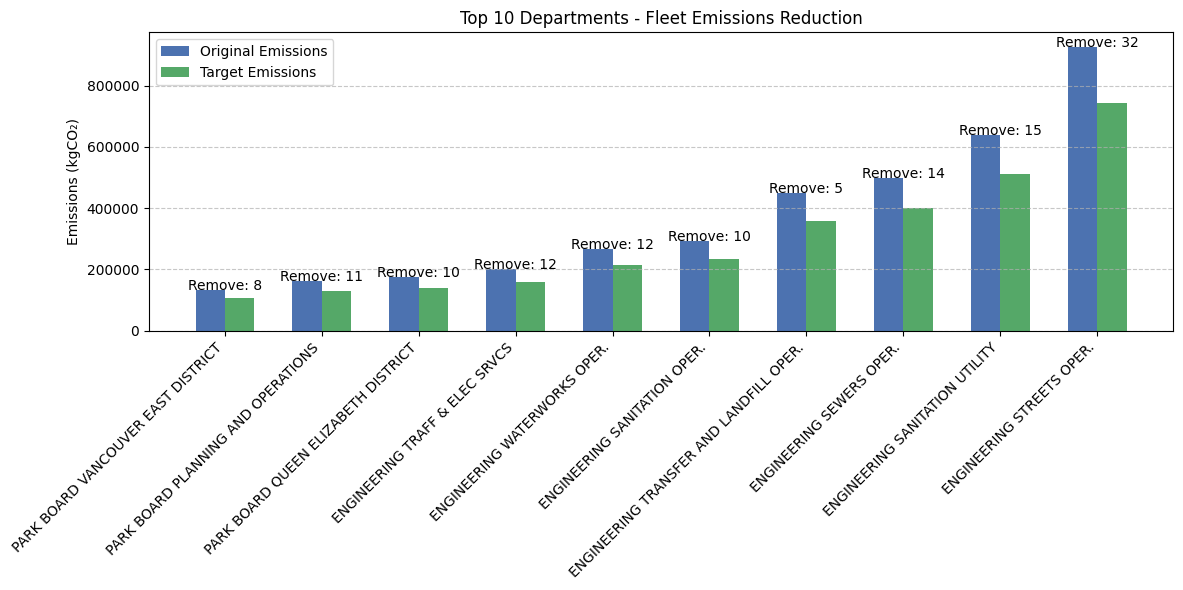

In [ ]:
top_n = 10
top_indices = np.argsort(original_emissions)[-top_n:]

plt.figure(figsize=(12,6))
plt.bar(np.arange(top_n) - width/2, np.array(original_emissions)[top_indices], width, label="Original Emissions", color="#4C72B0")
plt.bar(np.arange(top_n) + width/2, np.array(reduced_emissions)[top_indices], width, label="Target Emissions", color="#55A868")

top_labels = [departments[i] for i in top_indices]
plt.xticks(np.arange(top_n), top_labels, rotation=45, ha='right')

# Text annotations
for i, idx in enumerate(top_indices):
    plt.text(i, max(original_emissions[idx], reduced_emissions[idx]) + 5, f"Remove: {vehicles_removed[idx]}", ha='center', fontsize=10)

plt.ylabel("Emissions (kgCO₂)")
plt.title(f"Top {top_n} Departments - Fleet Emissions Reduction")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


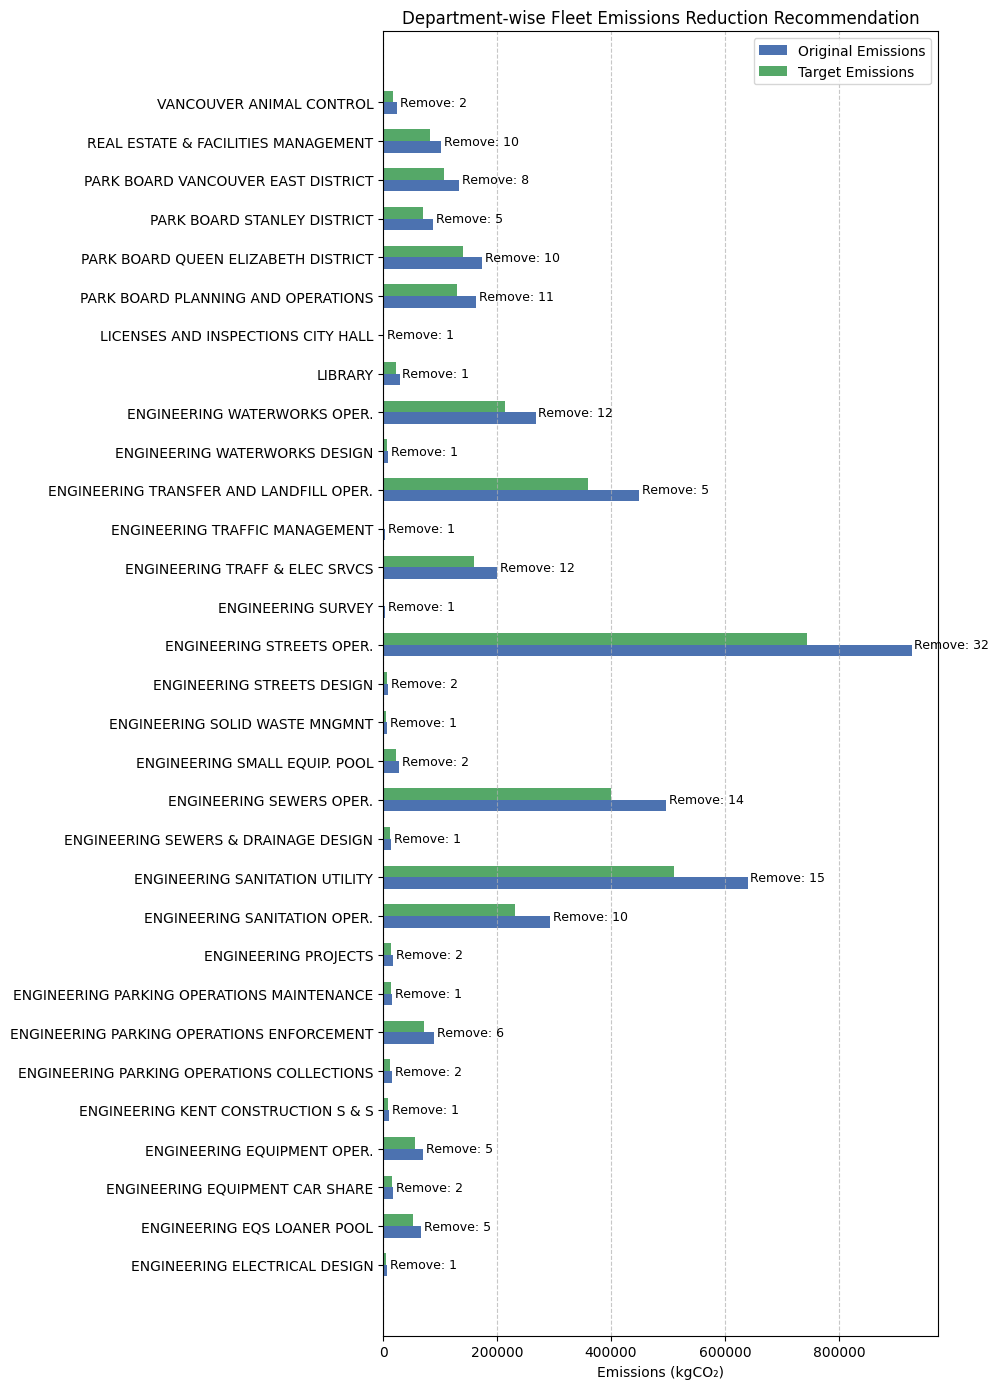

In [ ]:
plt.figure(figsize=(10,14))
y_pos = np.arange(len(departments))
plt.barh(y_pos - width/2, original_emissions, width, label="Original Emissions", color="#4C72B0")
plt.barh(y_pos + width/2, reduced_emissions, width, label="Target Emissions", color="#55A868")

plt.yticks(y_pos, departments)
for i, v in enumerate(vehicles_removed):
    plt.text(max(original_emissions[i], reduced_emissions[i]) + 5000, y_pos[i], f"Remove: {v}", va='center', fontsize=9)

plt.xlabel("Emissions (kgCO₂)")
plt.title("Department-wise Fleet Emissions Reduction Recommendation")
plt.legend()
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
df.head()

,Equipment Number,Equipment Class,Equipment Category,Service Group,Department,Make,Model,Year,Site,Mileage2014 (km),HourMeter2018 (hours),DowntimeHours2018 (hours),LaborHours2018 (hours),Emissions2018 (kgCO2)
0,A0006,"VAN, MINI, 7 PASSENGER",light duty,Engineering Services,ENGINEERING EQUIPMENT CAR SHARE,FORD,WINDSTAR,2003,CROSSROADS (507 W. BROADWAY),6040.0,NaN,740.432781,102.75251,1510.00
1,A0128,"AUTO, PASSENGER, COMPACT WAGON",light duty,Engineering Services,ENGINEERING SEWERS OPER.,FORD,FOCUS,2002,MANITOBA YD. (250 W. 70TH),1607.0,NaN,29.510834,4.07029,401.75
2,A0129,"AUTO, PASSENGER, MICRO COMPACT",light duty,Engineering Services,ENGINEERING SANITATION OPER.,MERCEDES,SMARTC,2008,MANITOBA YD. (250 W. 70TH),1323.0,NaN,4.696111,3.21806,330.75
3,A0131,"AUTO, PASSENGER, MICRO COMPACT",light duty,Engineering Services,ENGINEERING EQUIPMENT CAR SHARE,MERCEDES,SMARTC,2008,CROSSROADS (507 W. BROADWAY),3485.0,NaN,412.597220,54.35750,871.25
4,A0149,"AUTO, PASSENGER, COMPACT WAGON",light duty,Engineering Services,ENGINEERING STREETS OPER.,FORD,FOCUS,2006,NATIONAL YD. (701 NATIONAL),14379.0,NaN,89.826946,15.17277,3594.75


## Model building

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import joblib

In [ ]:
df = df.replace(['NULL', 'N/A'], pd.NA)

In [ ]:
# Converting to numeric
numeric_cols = ['Year', 'Mileage2014 (km)', 'HourMeter2018 (hours)', 'DowntimeHours2018 (hours)', 'LaborHours2018 (hours)']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
# Drop rows with missing target
df = df.dropna(subset=['DowntimeHours2018 (hours)'])

In [ ]:
# Features and target
target = 'DowntimeHours2018 (hours)'
num_cols = ['Year', 'Mileage2014 (km)', 'HourMeter2018 (hours)']
cat_cols = ['Equipment Class', 'Equipment Category', 'Service Group', 'Department', 'Make', 'Model', 'Site']
features = num_cols + cat_cols
X = df[features]
y = df[target]

In [ ]:
# Separate num and cat
X_num = X[num_cols]
X_cat = X[cat_cols]

In [ ]:
# Impute num
num_imputer = SimpleImputer(strategy='mean')
X_num = pd.DataFrame(num_imputer.fit_transform(X_num), columns=num_cols, index=X.index)

In [ ]:
encoders = {}
for col in cat_cols:
    encoders[col] = LabelEncoder()
    X_cat[col] = encoders[col].fit_transform(X_cat[col].astype(str))

/tmp/ipython-input-446634810.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cat[col] = encoders[col].fit_transform(X_cat[col].astype(str))
/tmp/ipython-input-446634810.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cat[col] = encoders[col].fit_transform(X_cat[col].astype(str))
/tmp/ipython-input-446634810.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [ ]:
# Concat
X = pd.concat([X_num, X_cat], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
# Train model
model = RandomForestRegressor(n_estimators=100, criterion="absolute_error",max_depth=7, min_samples_split=2,n_jobs=50, verbose=1 , random_state=42)
model.fit(X_train, y_train)

[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 out of 100 | elapsed:    1.9s finished


RandomForestRegressor(criterion='absolute_error', max_depth=7, n_jobs=50,
                      random_state=42, verbose=1)

In [108]:
# Evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}, R2: {r2}")

[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.


MSE: 27233.32462352519, R2: 0.5051195559567303


[Parallel(n_jobs=50)]: Done 100 out of 100 | elapsed:    0.2s finished


In [109]:
# Feature importances table
importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_}).sort_values(by='Importance', ascending=False)
print(importances.to_markdown(index=False))

| Feature               |   Importance |
|:----------------------|-------------:|
| Equipment Category    |   0.256871   |
| Mileage2014 (km)      |   0.218361   |
| Equipment Class       |   0.135005   |
| Department            |   0.116445   |
| HourMeter2018 (hours) |   0.0798165  |
| Make                  |   0.0690549  |
| Model                 |   0.0527557  |
| Year                  |   0.037635   |
| Site                  |   0.0297502  |
| Service Group         |   0.00430573 |


In [ ]:
#Saving model, imputer, encoders
joblib.dump(model, 'downtime_model.pkl')
joblib.dump(num_imputer, 'num_imputer.pkl')
joblib.dump(encoders, 'encoders.pkl')

['encoders.pkl']

In [ ]:
# Load saved objects
model = joblib.load('downtime_model.pkl')
num_imputer = joblib.load('num_imputer.pkl')
encoders = joblib.load('encoders.pkl')

In [ ]:
new_data = pd.DataFrame({
    'Equipment Class': ['AUTO, PASSENGER, COMPACT'],
    'Equipment Category': ['light duty'],
    'Service Group': ['Engineering Services'],
    'Department': ['ENGINEERING STREETS OPER.'],
    'Make': ['FORD'],
    'Model': ['FOCUS'],
    'Year': [2008],
    'Site': ['NATIONAL YD. (701 NATIONAL)'],
    'Mileage2014 (km)': [10000],
    'HourMeter2018 (hours)': [500]
})

In [ ]:
# Separate num and cat
new_num = new_data[num_cols]
new_cat = new_data[cat_cols]

In [ ]:
new_num = pd.DataFrame(num_imputer.transform(new_num), columns=num_cols)

In [ ]:
for col in cat_cols:
    try:
        new_cat[col] = encoders[col].transform(new_cat[col].astype(str))
    except ValueError:
        # Unknown category: assign -1 (or drop/handle as needed)
        new_cat[col] = -1

/tmp/ipython-input-3569223540.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_cat[col] = encoders[col].transform(new_cat[col].astype(str))
/tmp/ipython-input-3569223540.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_cat[col] = encoders[col].transform(new_cat[col].astype(str))
/tmp/ipython-input-3569223540.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [ ]:
# Concat
new_data_prepared = pd.concat([new_num, new_cat], axis=1)

In [ ]:
# Prediction
prediction = model.predict(new_data_prepared)
print(f"Predicted Downtime: {prediction[0]} hours")

Predicted Downtime: 48.89141664595998 hours
